In [1]:
from keypoint_dataset import KeypointDataset
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
datasetPath = "/home/giorgio6846/Code/Sign-AI/data/dataset.hdf5"
kd = KeypointDataset(datasetPath, return_label=True)

['dataset1', 'dataset2', 'dataset3', 'dataset4', 'dataset5', 'dataset6', 'dataset7']


In [3]:
len(kd)

12738

In [4]:
keypoints = kd[1][0]

In [17]:
kd[1][1].shape

torch.Size([3, 3072])

In [ ]:
shapes = [kd[idx][0].shape[0] for idx in range(len(kd))]
minValue = min(shapes)
maxValue = max(shapes)

print(minValue)
print(maxValue)

In [6]:
keypoints.shape[0]

148

Text(0.5, 1.0, 'Frame 0')

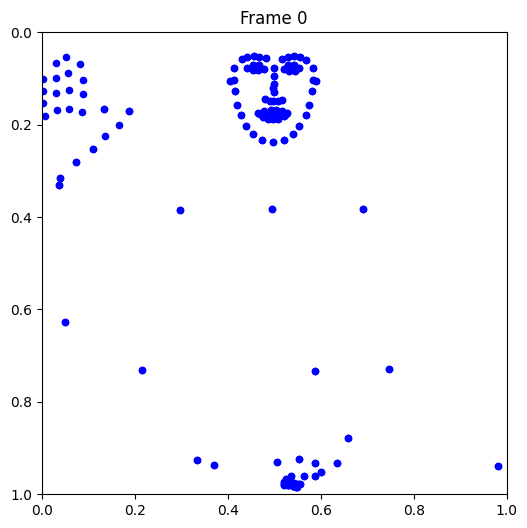

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
scat = ax.scatter(keypoints[0, :, 0], keypoints[0, :, 1], s=20, c='blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.invert_yaxis()
ax.set_title("Frame 0")

In [8]:
def update(frame_index):
    points = keypoints[frame_index]       # [250, 2]
    scat.set_offsets(points)           # Move every scatter point to new coords
    ax.set_title(f"Frame {frame_index}")
    return (scat,)

In [9]:
anim = FuncAnimation(
    fig,
    update,
    frames=keypoints.shape[0],  # 148
    interval=50,             # 50 ms between frames (≈20 FPS)
    blit=True
)
HTML(anim.to_jshtml())
